In [25]:
### 1. Neural Network Model 4 - Final Exam ###
### Fashion-MNIST as a CNN

# Import the libraries that will be needed.

print('Importing libraries...')
import os
import time
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Set level of TF screen logging suppression {'0', '1', '2'}
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
print('TensorFlow version', tf.__version__)
print('Done.')

Importing libraries...
TensorFlow version 2.12.0
Done.


In [26]:
# 2. Load training data

print('Loading training data...')
train = pd.read_csv('fashion-mnist_train.csv')
print('Done.')

Loading training data...
Done.


In [27]:
# 3. Here is where your class images, the test data, are being loaded
print('Loading test data...')
test = pd.read_csv('classTest.csv')
print('Done.')

Loading test data...
Done.


In [28]:
# 4. Shape data for training and testing

#Store first column as target vector
train_labels = np.array(train.label)
test_labels = np.array(test.label)

train.drop('label',axis=1, inplace=True)
test.drop('label',axis=1, inplace=True)

#Reshape - adding one more dimension to each image
train_data = np.array(train).reshape(train.shape[0],28,28,1)
test_data = np.array(test).reshape(test.shape[0],28,28,1)

#Print shapes
print('Train tensor shape: ',train_data.shape)
print('Test tensor shape: ',test_data.shape)
print('Single image shape:', train_data[0].shape)
print('Train_labels shape:', train_labels.shape)
print('Test_labels shape:', test_labels.shape)

Train tensor shape:  (60000, 28, 28, 1)
Test tensor shape:  (138, 28, 28, 1)
Single image shape: (28, 28, 1)
Train_labels shape: (60000,)
Test_labels shape: (138,)


In [29]:
# 5. Create label names
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

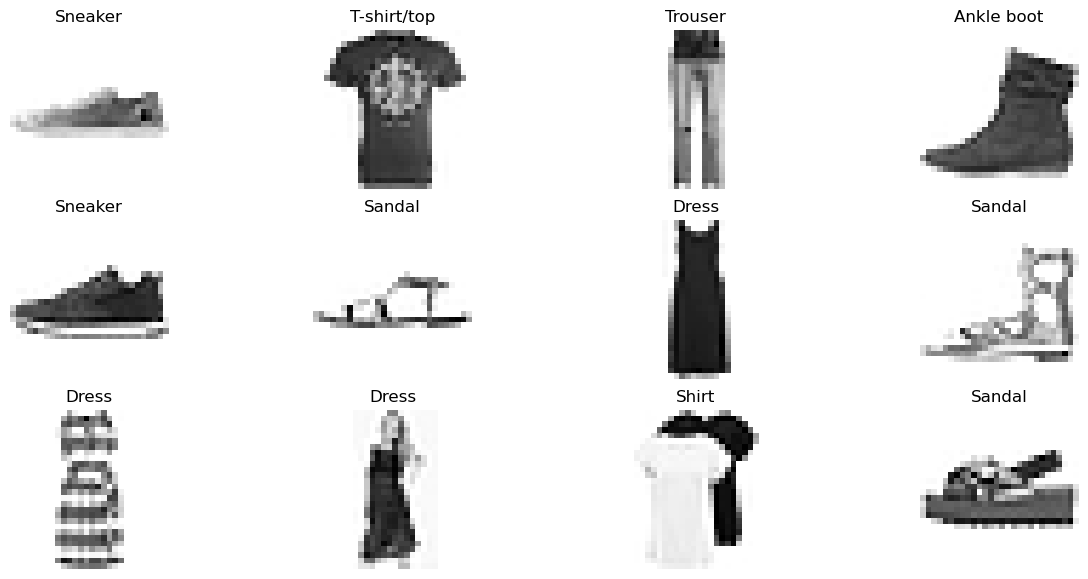

In [30]:
# 6. Show some of the training data images

import random
plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[train_labels[rand_index]])

In [31]:
# 7. Normalize the data

train_norm = train_data / 255.0
test_norm = test_data / 255.0

X_train = train_norm[10000:]
y_train = train_labels[10000:]

X_valid = train_norm[:10000]
y_valid = train_labels[:10000]

In [32]:
# 8. Build the CNN model

#Set random seed

import os
import time
import tensorflow as tf


tf.random.set_seed(42)

#Create model
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=5, kernel_size=2, strides=1, padding="same", activation="relu",
                           input_shape=(28,28,1)), 
    tf.keras.layers.Conv2D(10,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(15,3, padding="valid", activation='relu'),
    tf.keras.layers.Conv2D(20,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(25,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") #Output layer

])

In [33]:
# 9. Compile the model
#
# You set the learning rate in this code block.
# Original learning rate = 0.001

model.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

#Show summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 5)         25        
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 10)        460       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 15)        1365      
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 20)          2720      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                  

In [34]:
# 10. Train the CNN model
#
# You set the number of epochs and batch size in this code block

starting_time = time.time()
print("Training started...")

# Original: epochs = 5, batch_size = 32
history = model.fit(X_train, y_train,
                    epochs=50,batch_size=32,
                    validation_data=(X_valid,y_valid), verbose=1
                    )

print("Training ended.")
ending_time = time.time()
print('Time to train model: {:.4f}'.format(ending_time - starting_time),'seconds.')

Training started...
Epoch 1/50
1563/1563 [==============================] - 57s 35ms/step - loss: 0.6809 - accuracy: 0.7492 - val_loss: 0.4821 - val_accuracy: 0.8240
Epoch 2/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4561 - accuracy: 0.8356 - val_loss: 0.4144 - val_accuracy: 0.8527
Epoch 3/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.3914 - accuracy: 0.8578 - val_loss: 0.3736 - val_accuracy: 0.8663
Epoch 4/50
1563/1563 [==============================] - 52s 34ms/step - loss: 0.3558 - accuracy: 0.8719 - val_loss: 0.3425 - val_accuracy: 0.8741
Epoch 5/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.3318 - accuracy: 0.8805 - val_loss: 0.3303 - val_accuracy: 0.8778
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.3155 - accuracy: 0.8861 - val_loss: 0.3173 - val_accuracy: 0.8830
Epoch 7/50
1563/1563 [==============================] - 57s 36ms/step - loss: 0.3004 - accuracy: 0.8920 

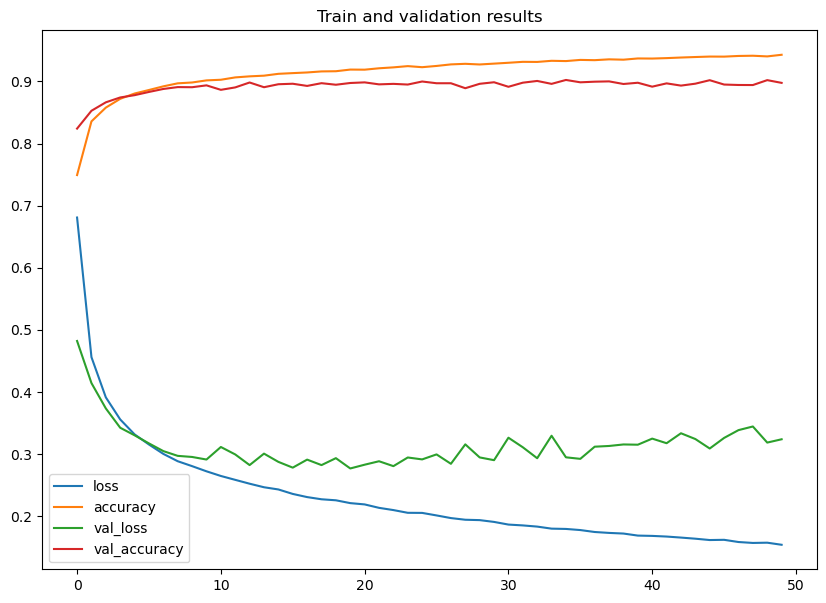

In [35]:
# 11. Plot the training and loss progress

pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

In [36]:
# 12. Get the accuracy of the class images test data

loss, accuracy = model.evaluate(test_norm, test_labels)
print('Test accuracy:' , accuracy * 100,'%')

5/5 [==============================] - 0s 12ms/step - loss: 0.2039 - accuracy: 0.9130
Test accuracy: 91.30434989929199 %


In [37]:
# 13. Make predictions for the confusion matrix

y_probs = model.predict(test_norm)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

5/5 [==============================] - 0s 9ms/step


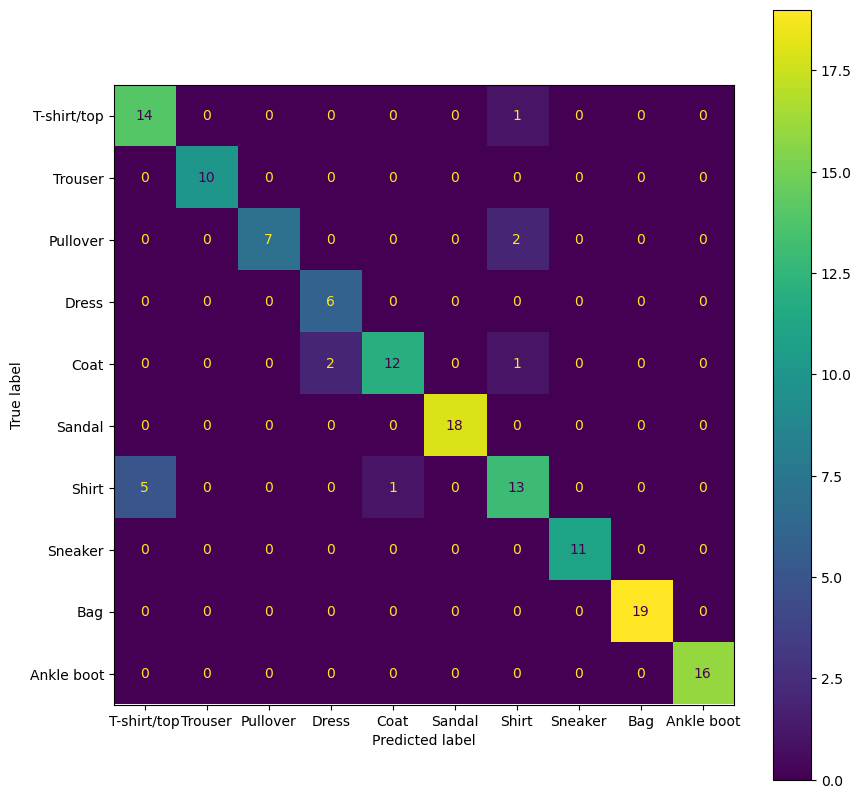

In [38]:
# 14. Display the Confusion Matrix
cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

     --------------------------------------- 10.6/10.6 MB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 302.2/302.2 kB ? eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
